
---

# Introduction to deep learning for computer vision
## Dogs vs Cats

---

<img src = "https://miro.medium.com/max/601/1*MBSM_G12XN105sEHsJ6C3A.png">

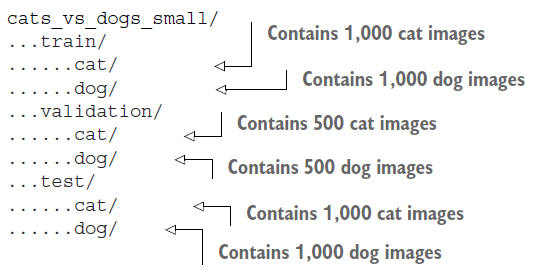

We will reuse the same general model structure you saw in the first example: the convnet
will be a stack of alternated Conv2D (with relu activation) and MaxPooling2D layers.

But because we’re dealing with bigger images and a more complex problem, we’ll
make our model larger, accordingly: it will have two more Conv2D and MaxPooling2D
stages. This serves both to augment the capacity of the model and to further reduce the
size of the feature maps so they aren’t overly large when we reach the Flatten layer.
Here, because we start from inputs of size 180 pixels × 180 pixels (a somewhat arbitrary
choice), we end up with feature maps of size 7 × 7 just before the Flatten layer.

Because we’re looking at a binary-classification problem, we’ll end the model with a
single unit (a Dense layer of size 1) and a sigmoid activation. This unit will encode the
probability that the model is looking at one class or the other.

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

**We will start the model with a Rescaling layer, which will rescale image inputs (whose values are originally in the [0, 255] range) to the [0, 1] range.**

In [2]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

In [3]:
model = keras.Model(inputs=inputs, outputs=outputs)

In [4]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [5]:
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

1. Read the picture files.
2. Decode the JPEG content to RGB grids of pixels.
3. Convert these into floating-point tensors.
4. Resize them to a shared size (we’ll use 180 × 180).
5. Pack them into batches (we’ll use batches of 32 images).

In [16]:
from tensorflow.keras.utils import image_dataset_from_directory

In [17]:
import os, shutil, pathlib

In [20]:
new_base_dir = pathlib.Path("cats_and_dogs_small/cats_and_dogs_small")

In [21]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)

validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)

test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [22]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]

In [ ]:
%%time
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 57s 881ms/step - loss: 0.7108 - accuracy: 0.5120 - val_loss: 0.6810 - val_accuracy: 0.4990
Epoch 2/30
63/63 [==============================] - 53s 839ms/step - loss: 0.7008 - accuracy: 0.5665 - val_loss: 0.6719 - val_accuracy: 0.6300
Epoch 3/30
63/63 [==============================] - 56s 889ms/step - loss: 0.6504 - accuracy: 0.6155 - val_loss: 0.8231 - val_accuracy: 0.5390
Epoch 4/30
63/63 [==============================] - 57s 900ms/step - loss: 0.6324 - accuracy: 0.6605 - val_loss: 0.6265 - val_accuracy: 0.6420
Epoch 5/30
63/63 [==============================] - 57s 897ms/step - loss: 0.5832 - accuracy: 0.6950 - val_loss: 0.5985 - val_accuracy: 0.6750
Epoch 6/30
63/63 [==============================] - 56s 889ms/step - loss: 0.5340 - accuracy: 0.7310 - val_loss: 0.7056 - val_accuracy: 0.6640
Epoch 7/30
63/63 [==============================] - 59s 935ms/step - loss: 0.5090 - accuracy: 0.7525 - val_loss: 0.7553 - val_accuracy: 0.6720

## Overfitting

In [ ]:
import matplotlib.pyplot as plt

#### Plotting the results

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#### Evaluating the model on the test set

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

## Using data augmentation

Overfitting is caused by having too few samples to learn from, rendering you unable
to train a model that can generalize to new data. Given infinite data, your model
would be exposed to every possible aspect of the data distribution at hand: you would
never overfit. Data augmentation takes the approach of generating more training data
from existing training samples by augmenting the samples via a number of random
transformations that yield believable-looking images. The goal is that, at training time,
your model will never see the exact same picture twice. This helps expose the model
to more aspects of the data so it can generalize better.

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))

x = data_augmentation(inputs)

x = layers.Rescaling(1./255)(x)

x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)

x = layers.Flatten()(x)

x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)


In [ ]:
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]

In [ ]:
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

#### Plot the results 

#### Check the test accuracy